In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'H')

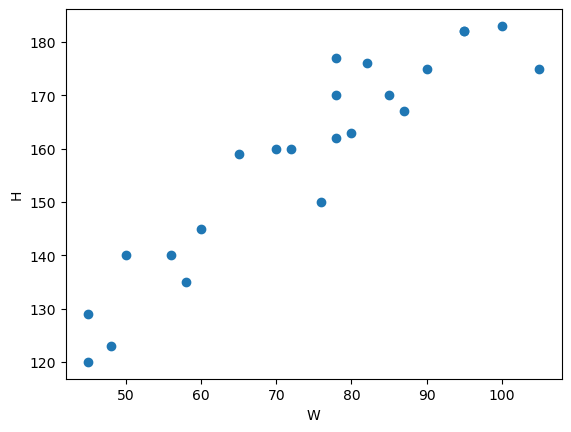

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('W')
plt.ylabel('H')

In [11]:
# divide into dependent and independent features
X = df[['Weight']]
y = df['Height']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [15]:
X.shape, X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((23, 1), (18, 1), (5, 1), (18,), (5,))

In [14]:
## standardize the dataset Train independent data apply Zscore on every value
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [19]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

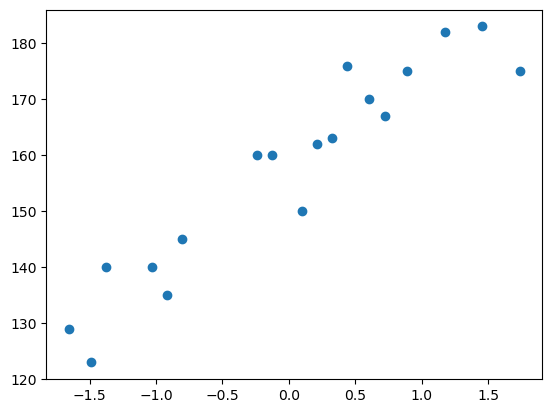

In [20]:
plt.scatter(X_train,y_train)

In [17]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [18]:
regressor=LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


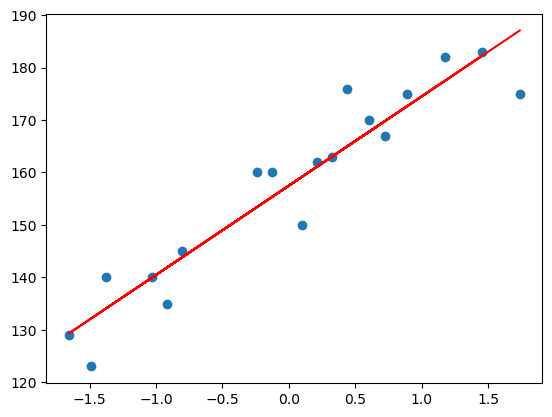

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [21]:
y_pred_test=regressor.predict(X_test)

In [22]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

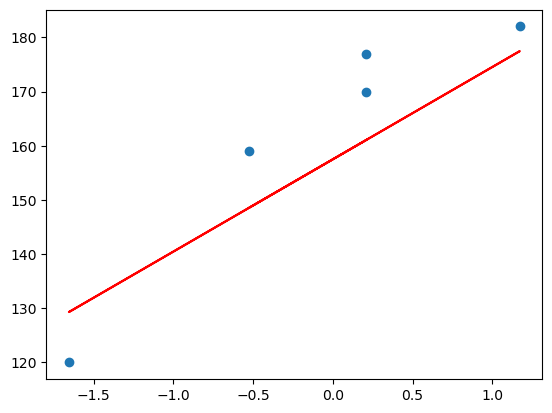

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

### Performance Metrics
## MSE,MAE,RMSE
## R square and adjusted R square

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula
**R^2 = 1 - SSR/SST**

R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

Adjusted R Square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [28]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

### Regressor

In [32]:
## new data point weight is 80

scaled_weight=scaler.transform([[85]])
scaled_weight

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.60618436]])

In [33]:
scaled_weight[0]

array([0.60618436])

In [35]:
print("The height prediction for weight 85 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 85 kg is : [167.82599217]


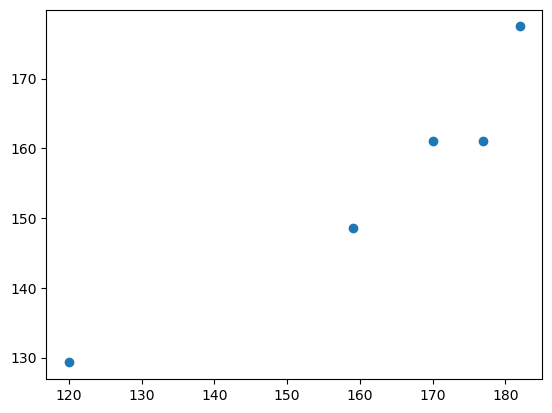

In [36]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [37]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

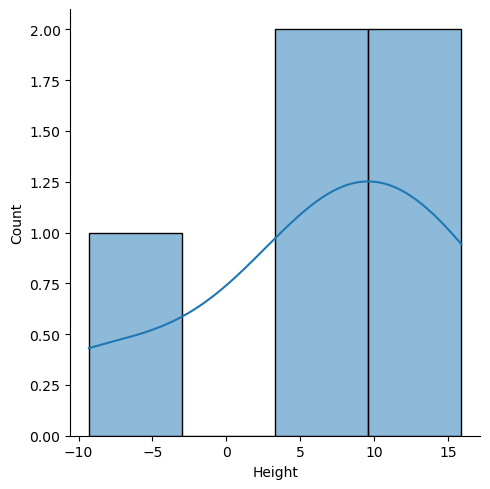

In [39]:
## plot this residuals
import seaborn as sns
sns.displot(residuals,kde=True)

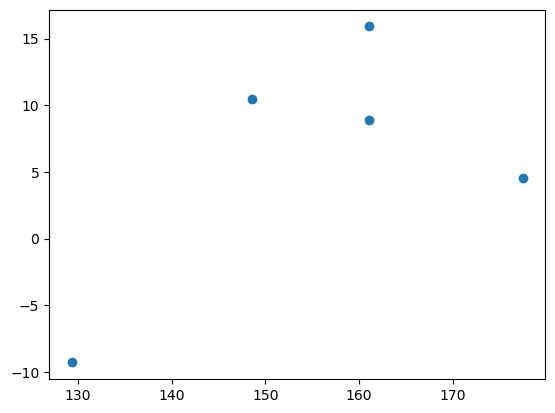

In [40]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)